## Librerias

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Problema

Considere la ecuación $x = 1 - e^{-cx}$, donde c es un parametro conocido y $x$ es la incógnita. Esta ecuación aparece en múltiples situaciones, incluidas la física de procesos de contacto, modelos epidemiológicos, y la teoría de grafos aleatorios. Puede usar el siguiente [notebook](https://github.com/diegour1/CompMetodosComputacionales/blob/main/Notebooks/02%20-%20BisectionNewtonRaphson.ipynb) como guía.

a) Use el método de Newton-Raphson para resolver esta ecuación para x para el caso $c=2$. Su solución debe tener una exactitud de $10^{-6}$. Use la variable float `solution_a` para guardar el resultado.

In [2]:
solution_a = 0
h = 10**-6
c = 2
x = np.linspace(-1,1,1000)

def Function(x):
    return 1 - x - np.e**(-c*x)

def Derivate(f,x,h=1e-4):
    return (f(x+h)-f(x-h))/(2*h)

def NewtonRaphson(f,df,xn,itmax = 100, precision=1e-5):
    error = 1
    it = 0

    while error > precision and it <= itmax:
        try:
            xn1 = xn - f(xn)/df(f,xn)
            error = np.abs(f(xn)/df(f,xn))
           
        except ZeroDivisionError:
            print('Division por cero')
        it += 1
        xn = xn1
    
    if it == itmax:
        False
    else:
        return xn

solution_a = NewtonRaphson(Function,Derivate,1)

## su codigo aqui

## codigo para verificar su resultado (no modificar)
print(solution_a)

0.7968121300200205


b) Modifique su programa para calcular la solución para valores de $c$ entre 0 y 3 en pasos de 0.01 y grafique $x$ en función de $c$ ( Realizar la gráfica $x(c)$ ). Usted debería ver una transición en la cual $x=0$ y luego pasa a ser diferente de cero. Este es un ejemplo de una transición de fase en física conocida como transición de percolación, y en epidemiología es el umbral epidemiológico. Nota no relacionada: Puede ver un problema computacional muy interesante del problema de la percolación en física en la siguiente [página](https://coursera.cs.princeton.edu/algs4/assignments/percolation/specification.php).

Text(0, 0.5, 'x')

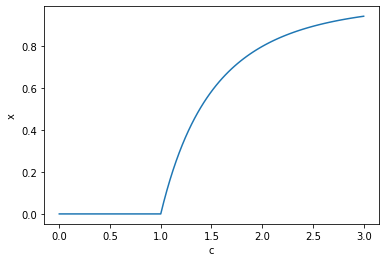

In [5]:
## su codigo aqui

values = np.linspace(0,3,100)
x_values = []
c_values = []

for i in values:
  def Function(x):
    return 1 - x - np.e**(-i*x)
  
  x_values.append(NewtonRaphson(Function,Derivate,1))
  c_values.append(i)

#gráfica
plt.plot(c_values,x_values)
plt.xlabel('c')
plt.ylabel('x')

c) Explique por qué lo que usted acaba de hacer es una gráfica de una función implícita. ( El término implícito aparece de forma más familiar en la derivada implícita )

**Respuesta:** Es una gráfica de una función implícita ya que la variable dependiente de la función se encuentra dentro de la misma, es decir que no está explícitamente. Por ende, al realizar su derivada con el método de Newton Rhapson, estámos "fijando" una de las variables con su derivada. Y así, iteramos sobre la otra variable para graficar.
